<a href="https://colab.research.google.com/github/leticiasbm/DSAnalytics/blob/Sprint-01/MVP_Let%C3%ADcia_Santos_Batista_de_Melo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Letícia Santos Batista de Melo

**Matrícula:** 4052025000754

**Dataset:** [Thyroid Cancer Risk Dataset](https://www.kaggle.com/datasets/mzohaibzeeshan/thyroid-cancer-risk-dataset/data)


# Descrição do Problema

O conjunto de dados "Thyroid Cancer Risk" (Risco de Câncer de Tireoide) é um *dataset* multivariado que possui como características: dados demográficos, histórico clínico, informações sobre o estilo de vida e níveis dos hormônios tireoidianos, com o objetivo de identificar a probabilidade de ocorrência da maioria dos cânceres de tireoide.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Problemas de tireoide são mais recorrentes em determinado gênero e/ou etnia?

- A influência do histórico familiar/genética se sobressai frente ao estilo de vida do paciente quando há diagnóstico positivo para câncer de tireoide?

- Há uma correlação entre os níveis dos hormônios tireoidianos e a presença de comorbidades, como diabetes e obesidade?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (idade, gênero, etnia, histórico familiar, exposição à radiação, deficiência de iodo, estilo de vida, comorbidades, níveis dos hormônios tireoidianos e tamanho de nódulos), o objetivo é prever o risco de ocorrência de câncer de tireoide (baixo, médio ou alto) de determinado paciente.

## Seleção de Dados

O *dataset "Thyroid Cancer Risk"* (Risco de Câncer de Tireoide) é um conjunto de dados disponível no Kaggle. Para sua utilização, é necessário baixar o arquivo .csv disponível e importá-lo para o Colab.

## Atributos do Dataset

O *dataset "Thyroid Cancer Risk"* (Risco de Câncer de Tireoide) contém 212691 amostras e 17 atributos, sendo:

- **Patient_ID** (número identificador do paciente);
- **Age** (idade do paciente);
- **Gender** (gênero do paciente - feminino/masculino);
- **Country** (país);
- **Ethnicity** (etnia);
- **Family_History** (histórico familiar de câncer de tireoide - sim/não);
- **Radiation_Exposure** (histório de exposição à radiação - sim/não);
- **Iodine_Deficiency** (presença de deficiência de iodo - sim/não);
- **Smoking** (fumante - sim/não);
- **Obesity** (obeso(a) - sim/não);
- **Diabetes** (diabético(a) - sim/não);
- **TSH_Level** (nível do hormônio TSH - µIU/mL);
- **T3_Level** (nível do hormônio T3 - ng/dL);
- **T4_Level** (nível do hormônio T4 - µg/dL);
- **Nodule_Size** (tamanho do nódulo tireoidiano - cm);
- **Thyroid_Cancer_Risk** (risco de câncer de tireoide - baixo/médio/alto);
- **Diagnosis** (diagnóstico final - maligno/benigno).


# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do *dataset* a partir do GitHub.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [9]:
# Carregamento do conjunto de dados a partir do GitHub

!git clone --branch Sprint-01 https://github.com/leticiasbm/DSAnalytics.git

Cloning into 'DSAnalytics'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 3.84 MiB | 3.75 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [10]:
# Importando conjunto de dados como .csv

data = pd.read_csv("/content/DSAnalytics/thyroid_cancer_risk_data.csv", sep = ",", encoding = "ISO-8859-1", decimal = ".")

In [11]:
# Armazenando o conjunto de dados em um DataFrame

dataframe = pd.DataFrame(data)
dataframe.head(10)

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
5,6,89,Male,UK,African,No,No,No,Yes,Yes,No,4.00,0.98,5.52,0.02,Medium,Benign
6,7,89,Female,South Korea,Asian,Yes,Yes,No,No,Yes,No,4.70,0.62,11.73,0.01,High,Malignant
7,8,38,Female,India,African,No,No,No,No,No,No,5.54,3.49,9.47,4.30,Medium,Benign
8,9,17,Female,Russia,African,No,Yes,No,No,No,Yes,2.30,2.60,11.89,0.81,High,Malignant
9,10,36,Male,Germany,Asian,No,No,No,No,Yes,No,1.34,0.56,4.51,1.44,Low,Benign


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o *dataset "Thyroid Cancer Risk"* (Risco de Câncer de Tireoide), visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O *dataset* possui 212691 instâncias (observações). Possui 6 variáveis numéricas, sendo 2 do tipo  *int* e 4 do tipo *float*; e 11 variáveis do tipo *object*, sendo 2 categóricas (Thyroid_Cancer_Risk e Diagnosis).

In [12]:
print(f"Total de instâncias: {len(dataframe)}")
print("\nTipos de dados por coluna:")
print(dataframe.info())

Total de instâncias: 212691

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size 

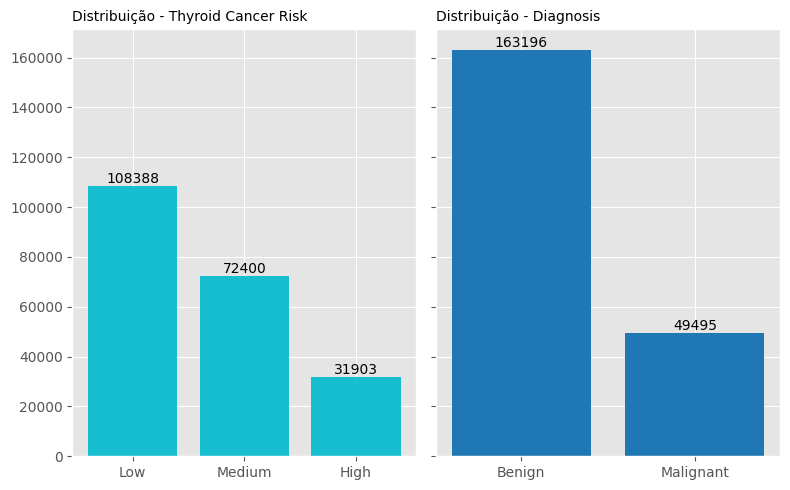

In [13]:
# Avaliando a distribuição das instâncias nas variáveis categóricas

# Configuração da paleta de cores
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 5), sharey = True)

tcr = ax[0].bar(dataframe["Thyroid_Cancer_Risk"].value_counts().index, dataframe["Thyroid_Cancer_Risk"].value_counts().values, color = "tab:cyan")
ax[0].set_title("Distribuição - Thyroid Cancer Risk", loc = "left", fontsize = 10)
#ax[0].set_xlabel("Risco", loc = "left")
#ax[0].set_ylabel("Frequência", loc = "bottom")
ax[0].bar_label(tcr, fmt = "%.0f")

dgs = ax[1].bar(dataframe["Diagnosis"].value_counts().index, dataframe["Diagnosis"].value_counts(), color = "tab:blue")
ax[1].set_title("Distribuição - Diagnosis", loc = "left", fontsize = 10)
#ax[1].set_xlabel("Classificação")
#ax[1].set_ylabel("Frequência")
ax[1].bar_label(dgs, fmt = "%.0f")

plt.tight_layout()
plt.show()

Os gráficos de barram mostram que no conjunto de dados há maior prevalecência de risco baixo e médio para câncer de tireoide e a maioria dos diagnósticos são de nódulos benignos.

In [14]:
# Identificação da Distribuição dos Valores em Outras Colunas

dataframe["Family_History"].value_counts()
dataframe["Radiation_Exposure"].value_counts()
dataframe["Iodine_Deficiency"].value_counts()
dataframe["Smoking"].value_counts()
dataframe["Obesity"].value_counts()
dataframe["Diabetes"].value_counts()

,count
Diabetes,
No,170098
Yes,42593


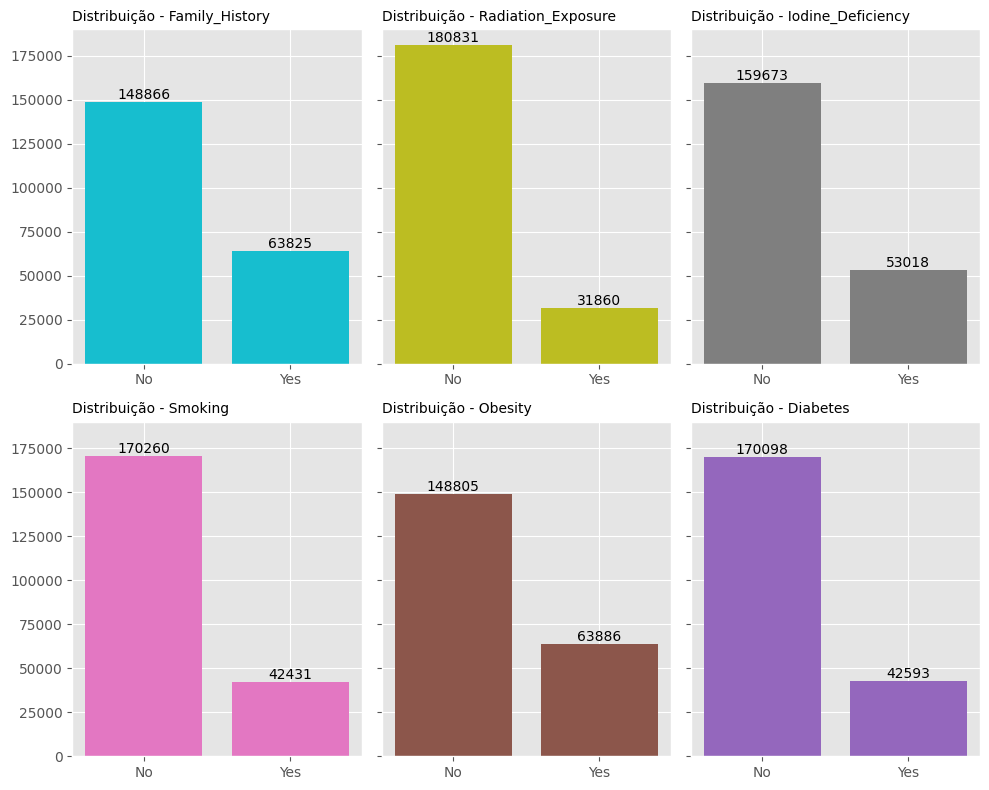

In [26]:
# Exibição Gráfica

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 8), sharey = True)

fh = ax[0,0].bar(dataframe["Family_History"].value_counts().index, dataframe["Family_History"].value_counts().values, color = "tab:cyan")
ax[0,0].set_title("Distribuição - Family_History", loc = "left", fontsize = 10)
ax[0,0].bar_label(fh, fmt = "%.0f")

re = ax[0,1].bar(dataframe["Radiation_Exposure"].value_counts().index, dataframe["Radiation_Exposure"].value_counts().values, color = "tab:olive")
ax[0,1].set_title("Distribuição - Radiation_Exposure", loc = "left", fontsize = 10)
ax[0,1].bar_label(re, fmt = "%.0f")

id = ax[0,2].bar(dataframe["Iodine_Deficiency"].value_counts().index, dataframe["Iodine_Deficiency"].value_counts().values, color = "tab:gray")
ax[0,2].set_title("Distribuição - Iodine_Deficiency", loc = "left", fontsize = 10)
ax[0,2].bar_label(id, fmt = "%.0f")

sm = ax[1,0].bar(dataframe["Smoking"].value_counts().index, dataframe["Smoking"].value_counts().values, color = "tab:pink")
ax[1,0].set_title("Distribuição - Smoking", loc = "left", fontsize = 10)
ax[1,0].bar_label(sm, fmt = "%.0f")

ob = ax[1,1].bar(dataframe["Obesity"].value_counts().index, dataframe["Obesity"].value_counts().values, color = "tab:brown")
ax[1,1].set_title("Distribuição - Obesity", loc = "left", fontsize = 10)
ax[1,1].bar_label(ob, fmt = "%.0f")

db = ax[1,2].bar(dataframe["Diabetes"].value_counts().index, dataframe["Diabetes"].value_counts().values, color = "tab:purple")
ax[1,2].set_title("Distribuição - Diabetes", loc = "left", fontsize = 10)
ax[1,2].bar_label(db, fmt = "%.0f")

plt.tight_layout()
plt.show()

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [27]:
# Estatísticas Descritivas Básicas

dataframe.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [28]:
# Média dos atributos numéricos do dataset

dataframe.describe().loc['mean']

,mean
Patient_ID,106346.000000
Age,51.918497
TSH_Level,5.045102
T3_Level,2.001727
T4_Level,8.246204
Nodule_Size,2.503403


In [ ]:
# Qual gráfico seria interessante usar pra mostrar a média?

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
sepal length (cm),0.828066
sepal width (cm),0.435866
petal length (cm),1.765298
petal width (cm),0.762238


In [ ]:
# Qual gráfico seria interessante usar pra mostrar o desvio padrão?

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *sepal length*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

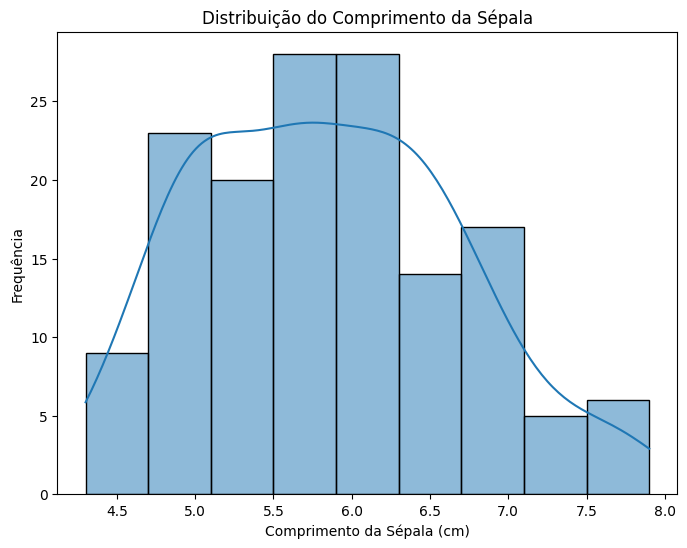

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição do comprimento da sépala. A curva de densidade estimada (KDE) nos indica que a distribuição parece bimodal ou multimodal, indicando que as espécies podem ter comprimentos de sépalas diferentes.

### *sepal width*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

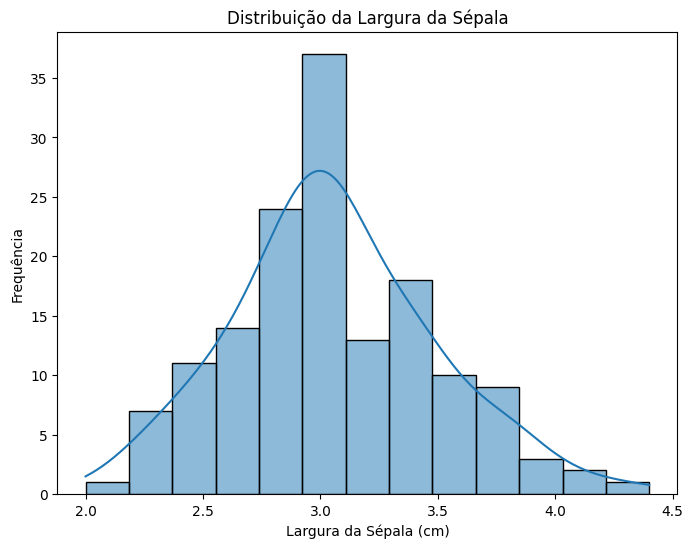

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['sepal width (cm)'], kde=True)
plt.title('Distribuição da Largura da Sépala')
plt.xlabel('Largura da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

Quais impressões você tem sobre a distribuição do atributo 'sepal width'?

## Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


In [ ]:
# Estatísticas descritivas agrupadas por espécie
df.groupby('species').describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
setosa                 50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

### *petal length* por Espécie


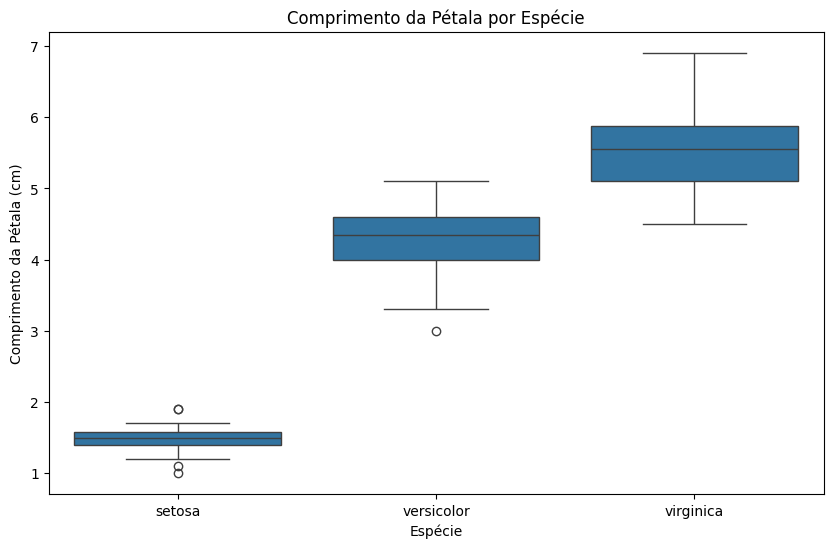

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Comprimento da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Pétala (cm)')
plt.show()

O boxplot do comprimento da pétala por espécie demonstra claramente que a Iris setosa tem pétalas significativamente mais curtas do que as outras duas espécies. Há uma sobreposição entre Iris versicolor e Iris virginica, mas as medianas e as caixas indicam uma distinção.

### *petal width* por Espécie

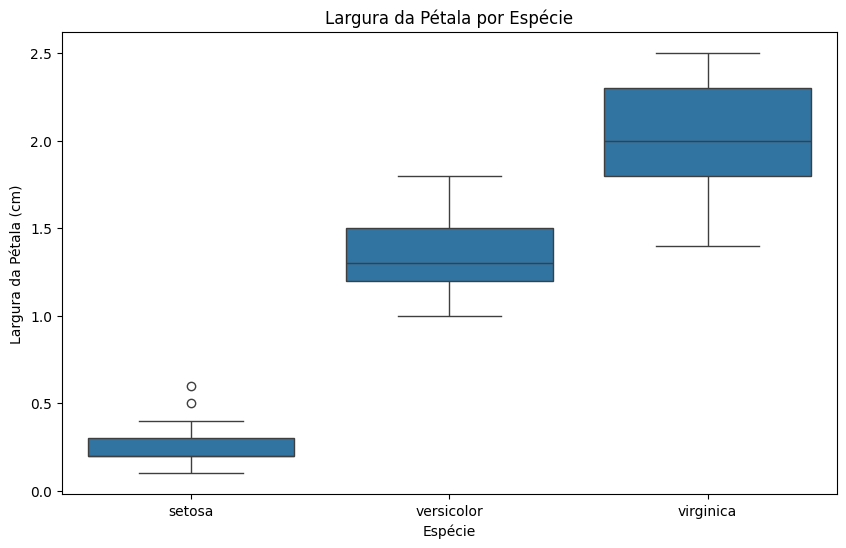

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Largura da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Largura da Pétala (cm)')
plt.show()

Quais impressões o boxplot trouxe?

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [ ]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:, :4].corr()


Matriz de Correlação:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


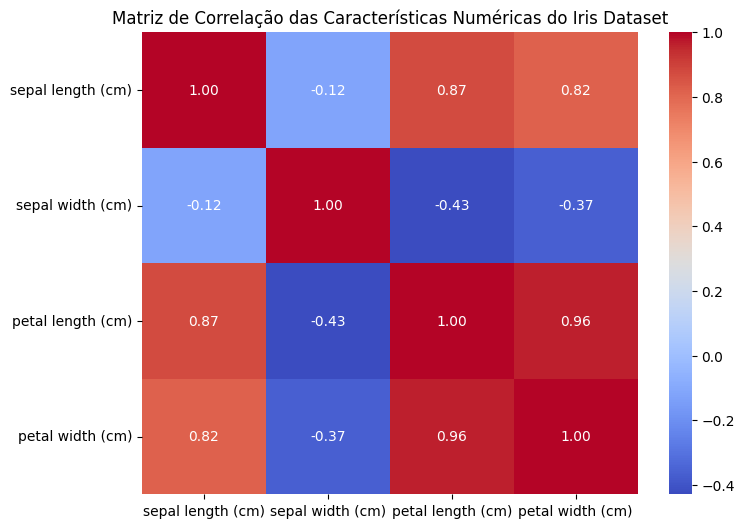

In [ ]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Iris Dataset')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlações positivas entre *petal length* e *petal width*, bem como entre *sepal length* e *petal length*/*petal width*. Isso sugere que essas características se movem juntas, o que é útil para a seleção de características.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
# Separar features (X) e target (y)
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (105, 4)
Dimensões de X_test: (45, 4)
Dimensões de y_train: (105,)
Dimensões de y_test: (45,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.208333           0.327586          0.416667
1           0.527778          0.083333           0.586207          0.583333
2           0.222222          0.750000           0.068966          0.083333
3           0.694444          0.500000           0.827586          0.916667
4           0.388889          0.333333           0.517241          0.500000


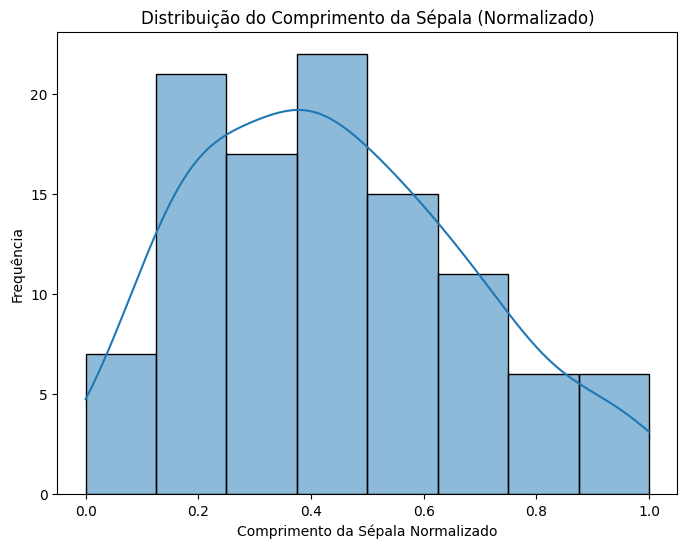

In [ ]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Normalizado)')
plt.xlabel('Comprimento da Sépala Normalizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900459         -1.220248          -0.441986         -0.136610
1           0.380366         -1.879558           0.402829          0.380294
2          -0.900459          1.636764          -1.286801         -1.170419
3           1.078998          0.318143           1.191323          1.414103
4          -0.201827         -0.560937           0.177545          0.121842


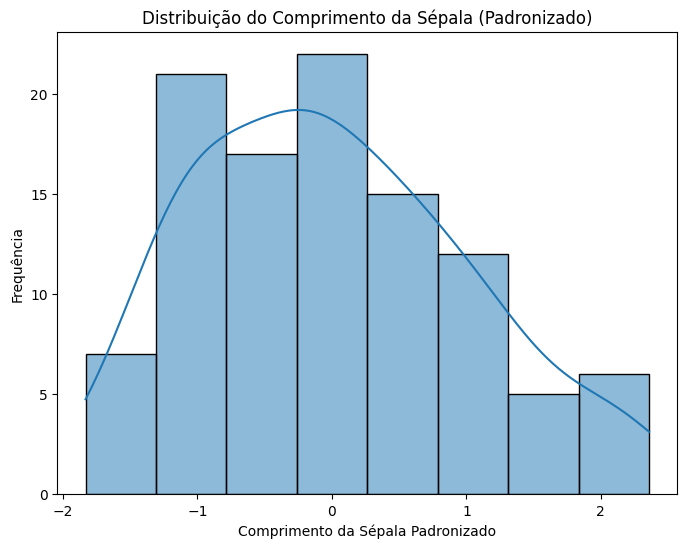

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Padronizado)')
plt.xlabel('Comprimento da Sépala Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Tratamento de Valores Nulos

O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.